In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

Задание 1

In [ ]:
data = pd.read_csv(r"C:\Users\mkuzo\Desktop\Программирование_2 сем\mag2022\CL\term02\02-Regularization, Normalization\Cellphone.csv")
data.head() 

In [ ]:
data.size

In [ ]:
data.shape

In [ ]:
data.dtypes


In [ ]:
data.dtypes.value_counts

In [ ]:
data.info

In [ ]:
data.info()

In [ ]:
for i in data:
    print(i)
    print(data[i].unique())

Я посмотрела, мне как-то все колонки нравятся, все может влиять на цену. Не очень поняла, что происходит с колонкой sale, там какие-то странные значения, за 100 и даже 1000 выходят, но это же скидка (??). Дропаю ее и Продукт_айди

In [ ]:
data["Sale"].unique()

In [ ]:
data.drop(columns = 'Product_id', axis = 1 , inplace = True)

In [ ]:
data.drop(columns = 'Sale', axis = 1 , inplace = True)

In [ ]:
data.head()

In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

In [ ]:
ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [ ]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'коэффициенты{coefficients}')

In [ ]:
data_1 = pd.DataFrame(data=np.c_[data.drop(columns = 'Price', axis = 1), data['Price']],
                     columns=list(data.drop(columns = 'Price', axis = 1)) + ['Price'])

In [ ]:
plt.figure(figsize=(9,12))

In [ ]:
corr = data_1.corr()

In [ ]:
g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200,300,as_cmap=True))

Видимо на цену не сильно влияют: weight и thickness. Попробую их дропнуть

In [ ]:
data.drop(columns = 'weight', axis = 1 , inplace = True)

In [ ]:
data.drop(columns = 'thickness', axis = 1 , inplace = True)

In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

In [ ]:
ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [ ]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'коэффициенты{coefficients}')

In [ ]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

In [ ]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

In [ ]:
lasso_cv.coef_

In [ ]:
lasso_cv.alpha_

In [ ]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

In [ ]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

In [ ]:
ridge_cv.alpha_

In [ ]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

In [ ]:
regr = ElasticNet(alpha=3.0, l1_ratio=0.5, random_state=None)

In [ ]:
regr.fit(X, y)

In [ ]:
print(regr.coef_)

In [ ]:
print(regr.intercept_)

Задание 2

In [ ]:
data = pd.read_csv(r"C:\Users\mkuzo\Desktop\Программирование_2 сем\mag2022\CL\term02\02-Regularization, Normalization\diet_data.csv")
data.head() 

In [ ]:
data.size


In [ ]:
data.shape


In [ ]:
data.dtypes


In [ ]:
data.dtypes.value_counts()


In [ ]:
data.info()

Много нан = плохо

In [ ]:
data = data.dropna()

In [ ]:
data.info()

In [ ]:
for c in data:
    print(c)
    print(data[c].unique())

Тяжело.. непонятно, что обозначает что..

In [ ]:
data.drop(columns = 'Date', axis = 1 , inplace = True)

In [ ]:
data['cals_per_oz'] = data['cals_per_oz'].astype('float')

In [ ]:
data.info()

In [ ]:
X = data.drop('change', axis=1)
y = data['change']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

In [ ]:
ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [ ]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'коэффициенты{coefficients}')

In [ ]:
data_1 = pd.DataFrame(data=np.c_[data.drop(columns = 'change', axis = 1), data['change']],
                     columns=list(data.drop(columns = 'change', axis = 1)) + ['change'])

In [ ]:
plt.figure(figsize=(9,12))

In [ ]:
corr = data_1.corr()

In [ ]:
g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200,300,as_cmap=True))

Ничего не нравится...

In [ ]:
data.drop(columns = 'Stone', axis = 1 , inplace = True)

In [ ]:
data.drop(columns = 'five_donuts', axis = 1 , inplace = True)

In [ ]:
data.drop(columns = 'prot', axis = 1 , inplace = True)

In [ ]:
data.drop(columns = 'wine', axis = 1 , inplace = True)

In [ ]:
data.head()

In [ ]:
X = data.drop('change', axis=1)

y = data['change']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [ ]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

жуть ^

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

In [ ]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

In [ ]:
lasso_cv.coef_

In [ ]:
lasso_cv.alpha_

In [ ]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

In [ ]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

In [ ]:
ridge_cv.alpha_

In [ ]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

In [ ]:
regressor3.coef_

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

In [ ]:
regr = ElasticNet(alpha=3.0, l1_ratio=0.5, random_state=None)

In [ ]:
regr.fit(X, y)

In [ ]:
print(regr.coef_) 

In [ ]:
print(regr.intercept_) 

^^^^^^^^^^^ все плохо....

Задание 3

In [172]:
data = pd.read_csv(r"C:\Users\mkuzo\Desktop\Программирование_2 сем\mag2022\CL\term02\02-Regularization, Normalization\Life Expectancy Data.csv")
data.head() 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [173]:
data.size

64636

In [174]:
data.shape

(2938, 22)

In [175]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [176]:
data.dtypes.value_counts()

float64    16
int64       4
object      2
dtype: int64

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [178]:
for c in data:
    print(c)
    print(data[c].unique())

Country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Repub

С названиями колонок беда: рандомно стоят пробелы перед или после названия колонки и портят все.
Быстрое фикс-решение: data.columns = data.columns.str.replace(' ', '').
Чем хорошо: убирает все пробелы.
Чем плохо: убирает ВСЕ пробелы, и колонки типа "Life expectancy " становятся "Lifeexpectancy".
Но это лучше, чем мучиться и угадывать, что ему не нравится в названии.
можно также заменить пробел на _

In [179]:
data.columns = data.columns.str.replace(' ', '_')

In [180]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy_                 2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles_                         2938 non-null   int64  
 10  _BMI_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   int64  
 12  Polio               

Что можно удалить: year и status видимо указывают на процесс сбора данных (год когда данные собирались + завершен ли сбор данных или нет)

In [181]:
data.drop(columns = 'Year', axis = 1 , inplace = True)

In [182]:
data.drop(columns = 'Status', axis = 1 , inplace = True)

Взрослая и младенческая смертность остаются, т. к. эти факторы могут влиять на продолжительность жизни. Болячки тоже остаются (гепатит, вич/спид, корь и т.д.).

Алкоголь пока пусть останется, но под ?  

BMI -- индекс массы тела. Возможно, это связано с бедностью страны и голодом (или ожирением), лучше оставить

under-five deaths  -- дроп, потому что есть младенческая смертность

In [183]:
data.drop(columns = 'under-five_deaths_', axis = 1, inplace = True)

Непонятные колонки: percentage expenditure, Total expenditure и Income composition of resources

In [184]:
data.drop(columns = 'percentage_expenditure', axis = 1 , inplace = True)

In [185]:
data.drop(columns = 'Total_expenditure', axis = 1 , inplace = True)

In [186]:
data.drop(columns = 'Income_composition_of_resources', axis = 1 , inplace = True)

Population оставляем. 


GDP оставляем: это ВВП и влияет на экономику страны и ее развитие > благосостояние граждан

Колонки thinness  1-19 years и thinness 5-9 years дроп: есть колонка с подсчетом индекса массы тела


Образование оставляю. 

In [187]:
data.drop(columns = '_thinness__1-19_years', axis = 1 , inplace = True)


In [188]:
data.drop(columns = '_thinness_5-9_years', axis = 1 , inplace = True)

Теперь надо решить что делать с Country.
Кажется, страну можно просто дропнуть: ее прекрасно заменяет параметр ВВП, который указывает на развитые страны vs. третьего мира
(то есть по ВВП можно отличить условные США от Афганистана)

In [189]:
data.drop(columns = 'Country', axis = 1 , inplace = True)

In [190]:
data.head()

,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,Hepatitis_B,Measles_,_BMI_,Polio,Diphtheria_,_HIV/AIDS,GDP,Population,Schooling
0,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,65.0,0.1,584.259210,33736494.0,10.1
1,59.9,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,327582.0,10.0
2,59.9,268.0,66,0.01,64.0,430,18.1,62.0,64.0,0.1,631.744976,31731688.0,9.9
3,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,3696958.0,9.8
4,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,2978599.0,9.5


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Life_expectancy_  2928 non-null   float64
 1   Adult_Mortality   2928 non-null   float64
 2   infant_deaths     2938 non-null   int64  
 3   Alcohol           2744 non-null   float64
 4   Hepatitis_B       2385 non-null   float64
 5   Measles_          2938 non-null   int64  
 6   _BMI_             2904 non-null   float64
 7   Polio             2919 non-null   float64
 8   Diphtheria_       2919 non-null   float64
 9   _HIV/AIDS         2938 non-null   float64
 10  GDP               2490 non-null   float64
 11  Population        2286 non-null   float64
 12  Schooling         2775 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 298.5 KB


НАНЫ!!!!!!!

In [192]:
data = data.dropna()

In [193]:
data_1 = pd.DataFrame(data=np.c_[data.drop(columns = 'Life_expectancy_', axis = 1), data['Life_expectancy_']],
                     columns=list(data.drop(columns = 'Life_expectancy_', axis = 1)) + ['Life_expectancy_'])

In [194]:
plt.figure(figsize=(50,50))

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

In [195]:
corr = data_1.corr()

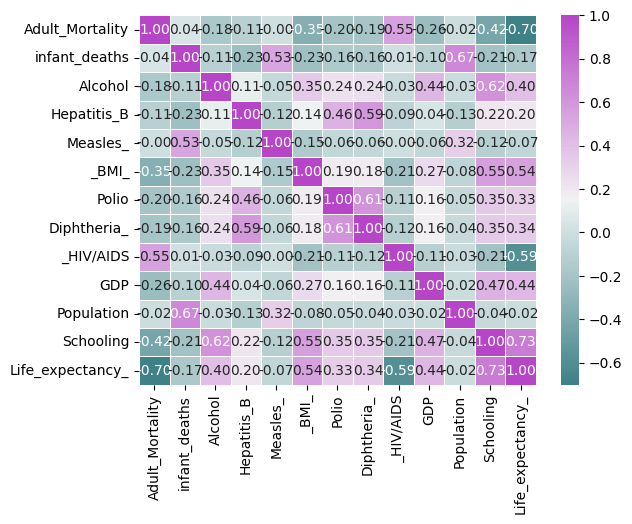

In [196]:
g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200,300,as_cmap=True))

Образование провоцирует алкогольную зависимость ))

Вроде все норм, но по всей видимости численность населения страны не влияет на продолжительность жизни, значит, можно дропнуть

In [197]:
data.drop(columns = 'Population', axis = 1 , inplace = True)

In [198]:
X = data.drop('Life_expectancy_', axis=1)
y = data['Life_expectancy_']

In [199]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

In [200]:
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [201]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.8106018933043786, 0.8019294603986639)

^ такое намного больше мне нравится чем в задании 2

In [202]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Adult_Mortality,-2.447054
1,infant_deaths,-0.215146
2,Alcohol,-0.231398
3,Hepatitis_B,-0.162055
4,Measles_,0.177078
5,_BMI_,1.043988
6,Polio,0.159157
7,Diphtheria_,0.533700
8,_HIV/AIDS,-2.660504
9,GDP,0.953952


In [203]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

In [204]:
lasso_cv.coef_

array([-2.05830020e-02, -2.50472695e-03, -0.00000000e+00, -5.99519930e-03,
        1.65592203e-05,  5.24555988e-02,  1.04292711e-02,  2.80251410e-02,
       -4.34302215e-01,  8.61888356e-05,  1.17074351e+00])

In [205]:
lasso_cv.alpha_

0.39849246231155777

In [206]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.8039217438945397 0.7954552771885509


Попробовала L2 регуляризацию, все испортилось, поэтому без нее обойдемся

In [207]:
regr = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)

In [208]:
regr.fit(X, y)

ElasticNet(random_state=0)

In [209]:
regr.coef_

array([-2.15667455e-02, -2.68773881e-03,  0.00000000e+00, -5.59920839e-03,
        1.65036330e-05,  6.01586328e-02,  1.24743201e-02,  3.03086770e-02,
       -4.20239206e-01,  9.68875761e-05,  1.01540632e+00])

In [210]:
regr.intercept_

55.52549397974143